# TP 1 - Prise en main de Keras

Dans ce TP, vous allez pouvoir prendre en main Keras pour construire et entraîner vos premiers réseaux de neurones. Nous vous fournissons une base de code permettant de reproduire un exemple simple du type de ceux présentés sur le site [playground.tensorflow.org](http://playground.tensorflow.org). L'objectif du TP est de modifier ce code afin d'illustrer certains concepts vus en cours.

# Génération des données

Génération de données ressemblant aux données "circulaires" du playground : il s'agit d'un nuage de points en deux dimensions répartis en deux classes ("bleu" et "orange")

In [1]:
import math
import numpy as np

# Le paramètre noise désigne le pourcentage du nombre de données n que l'on veut bruiter
def generateData(n, noise=0):

  a = np.random.rand(n) * 2 * np.pi
  c1 = (1.5+np.random.rand(n)*2)*np.random.rand(n)*np.vstack((np.cos(a), np.sin(a)))

  b = np.random.rand(n) * 2 * np.pi
  c2 = (3+np.random.rand(n)+np.random.rand(n)*2)*np.vstack((np.cos(b), np.sin(b)))

  x = np.concatenate((c1,c2), axis=1)
  x = np.transpose(x)  
  y = np.concatenate((np.zeros((n)),np.ones((n))),axis=0)
  
  permutation = np.random.permutation(2*n)   
  x = x[permutation]
  y = y[permutation]
    
  y[0:math.floor(n*noise/100)] = 1 -  y[0:math.floor(n*noise/100)] 

  return x, y

Affichage des données générées

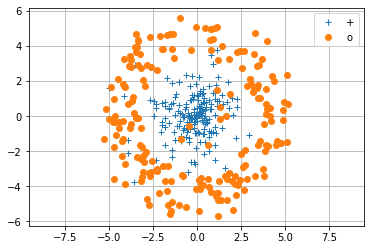

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

x, y = generateData(200, noise=10)

plt.plot(x[:,0][np.where(y == 0)], x[:,1][np.where(y == 0)], '+', label='+')
plt.plot(x[:,0][np.where(y == 1)], x[:,1][np.where(y == 1)], 'o', label='o')

plt.axis('equal')
plt.legend()
plt.grid()

Fonction utile par la suite d'affichage de l'évolution de la perte (erreur d'apprentissage et de validation) au cours de l'entraînement

In [3]:
def plot_loss(val_loss, train_loss):
  plt.plot(val_loss, color='green', label='Erreur de validation')
  plt.plot(train_loss, color='blue', linestyle='--', label='Erreur d\'entraînement')
  plt.xlabel('Epochs')
  plt.ylim(0, 1)
  plt.title('Évolution de la perte sur les ensembles d\'apprentissage et de validation au cours de l\'apprentissage')
  plt.legend()
  plt.show()

Construction du modèle : ici le modèle a une seule couche cachée à 2 neurones avec une fonction d'activation relu, et une couche de sortie à 1 neurone avec une activation sigmoide (classification binaire !)

<img src="https://drive.google.com/uc?id=1Aa9fmTa9hvm8sLCn30ZtTJrMd2m5TuBo">
<caption><center> Figure 1: réseau de neurones implémenté ci-dessous </center></caption>

In [4]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(2, activation='relu', input_dim=2)) # input_dim indique la dimension de la couche d'entrée, ici 2 (x1 et x2)
model.add(Dense(1, activation='sigmoid'))

model.summary() # affiche un résumé du modèle

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


Mise en place de l'optimisation par descente de gradient stochastique

In [5]:
from keras import optimizers

sgd = optimizers.SGD(lr=0.03) # On choisit la descente de gradient stochastique, avec un taux d'apprentssage de 0.03

# On définit ici, pour le modèle introduit plus tôt, l'optimiseur choisi, la fonction de perte (ici
# l'entropie croisée car classification binaire) et les métriques que l'on veut observer pendant
# l'entraînement. L'accuracy est le pourcentage de bonnes classifications.
model.compile(optimizer=sgd,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entraînement du modèle avec des mini-batchs de taille 10, sur 200 epochs. 
# Le paramètre validation_split signifie qu'on tire aléatoirement une partie des données
# (ici 20%) pour servir d'ensemble de validation
history = model.fit(x, y, validation_split=0.2, epochs=200, batch_size=10)


Epoch 1/200
32/32 [==============================] - 0s 9ms/step - loss: 0.6511 - accuracy: 0.5719 - val_loss: 0.6248 - val_accuracy: 0.6625
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6399 - accuracy: 0.6187 - val_loss: 0.6125 - val_accuracy: 0.7125
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6291 - accuracy: 0.6594 - val_loss: 0.5987 - val_accuracy: 0.7125
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6182 - accuracy: 0.6625 - val_loss: 0.5861 - val_accuracy: 0.7375
Epoch 5/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6067 - accuracy: 0.7063 - val_loss: 0.5719 - val_accuracy: 0.7625
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 0.5954 - accuracy: 0.7219 - val_loss: 0.5581 - val_accuracy: 0.7875
Epoch 7/200
32/32 [==============================] - 0s 5ms/step - loss: 0.5832 - accuracy: 0.7312 - val_loss: 0.5443 - val_accuracy: 0.8000
Epoch 8/200
3

32/32 [==============================] - 0s 4ms/step - loss: 0.4342 - accuracy: 0.8188 - val_loss: 0.4199 - val_accuracy: 0.7625
Epoch 59/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4335 - accuracy: 0.8219 - val_loss: 0.4187 - val_accuracy: 0.7625
Epoch 60/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4340 - accuracy: 0.8219 - val_loss: 0.4208 - val_accuracy: 0.7625
Epoch 61/200
32/32 [==============================] - 0s 3ms/step - loss: 0.4339 - accuracy: 0.8281 - val_loss: 0.4218 - val_accuracy: 0.7625
Epoch 62/200
32/32 [==============================] - 0s 3ms/step - loss: 0.4332 - accuracy: 0.8156 - val_loss: 0.4220 - val_accuracy: 0.7625
Epoch 63/200
32/32 [==============================] - 0s 3ms/step - loss: 0.4334 - accuracy: 0.8188 - val_loss: 0.4196 - val_accuracy: 0.7625
Epoch 64/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4339 - accuracy: 0.8250 - val_loss: 0.4227 - val_accuracy: 0.7625
Epoch 65/200
32/32 

32/32 [==============================] - 0s 3ms/step - loss: 0.4325 - accuracy: 0.8125 - val_loss: 0.4191 - val_accuracy: 0.7750
Epoch 116/200
32/32 [==============================] - 0s 3ms/step - loss: 0.4328 - accuracy: 0.8125 - val_loss: 0.4166 - val_accuracy: 0.7750
Epoch 117/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4324 - accuracy: 0.8094 - val_loss: 0.4227 - val_accuracy: 0.7750
Epoch 118/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4324 - accuracy: 0.8156 - val_loss: 0.4233 - val_accuracy: 0.7750
Epoch 119/200
32/32 [==============================] - 0s 3ms/step - loss: 0.4329 - accuracy: 0.8156 - val_loss: 0.4228 - val_accuracy: 0.7625
Epoch 120/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4334 - accuracy: 0.8156 - val_loss: 0.4201 - val_accuracy: 0.7625
Epoch 121/200
32/32 [==============================] - 0s 3ms/step - loss: 0.4319 - accuracy: 0.8188 - val_loss: 0.4217 - val_accuracy: 0.7625
Epoch 122/200

32/32 [==============================] - 0s 3ms/step - loss: 0.4323 - accuracy: 0.8250 - val_loss: 0.4165 - val_accuracy: 0.7875
Epoch 173/200
32/32 [==============================] - 0s 3ms/step - loss: 0.4327 - accuracy: 0.8219 - val_loss: 0.4169 - val_accuracy: 0.7875
Epoch 174/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4337 - accuracy: 0.8219 - val_loss: 0.4176 - val_accuracy: 0.7875
Epoch 175/200
32/32 [==============================] - 0s 3ms/step - loss: 0.4329 - accuracy: 0.8156 - val_loss: 0.4187 - val_accuracy: 0.7875
Epoch 176/200
32/32 [==============================] - 0s 3ms/step - loss: 0.4325 - accuracy: 0.8188 - val_loss: 0.4160 - val_accuracy: 0.7875
Epoch 177/200
32/32 [==============================] - 0s 3ms/step - loss: 0.4327 - accuracy: 0.8188 - val_loss: 0.4152 - val_accuracy: 0.7875
Epoch 178/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4330 - accuracy: 0.8156 - val_loss: 0.4159 - val_accuracy: 0.7875
Epoch 179/200

Affichage de l'évolution de la perte puis évaluation sur un nouveau jeu de données, qui agit donc comme un ensemble de test (différent des ensembles d'apprentissage et de validation)

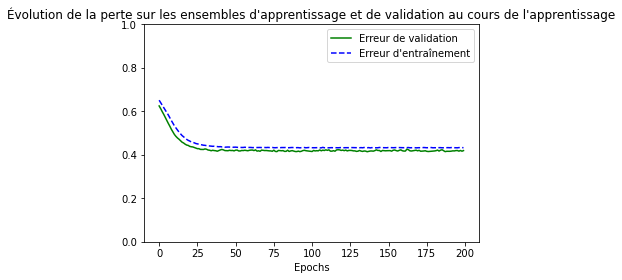

In [6]:
val_loss=(history.history['val_loss'])
train_loss=(history.history['loss'])
plot_loss(val_loss, train_loss)

In [7]:
x_test, y_test = generateData(100, noise=10)
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 6ms/step - loss: 0.5539 - accuracy: 0.7900


[0.553855299949646, 0.7900000214576721]

# Travail à effectuer

Votre objectif pendant ce TP est de prendre en main Keras en illustrant quelques concepts vus en cours, et rappelés sur les vidéos ci-dessous.

**1 - Évanescence des gradients avec la fonction sigmoïde et correction grâce à la fonction reLU.
(la cellule ci-après affiche une vidéo qui illustre cet exemple).**


In [8]:
from IPython.display import IFrame
IFrame("https://video.polymny.studio/?v=82ed9784-4f22-4922-ac9a-08c298e983f4/", width=640, height=360)

Commencez par créer un réseau à 3 couches cachées de 4 neurones chacune, portant une fonction d'activation sigmoide, et essayez d'entraîner ce réseau. Vous devriez observer que la fonction de perte n'évolue pas au cours du temps, ceci à cause de l'evanescence des gradients. 

Dans un second temps, remplacez la fonction d'activation des couches cachées par une reLU et observez l'effet immédiat de ce changement sur l'entraînement.

**2 - Ajout d'un terme de régularisation L1 ou L2 et impact sur le sur-apprentissage.**

In [9]:
IFrame("https://video.polymny.studio/?v=e9580db4-8c91-486e-bb67-2edbdcfa887b/", width=640, height=360)

Commencez d'abord par générer des données bruitées (paramètre *noise* à 50)

Comme expliqué dans la vidéo, créez un réseau à 6 couches cachées et n'hésitez pas à utiliser un grand nombre de neurones dans ces couches cachées (par exemple, 50) afin d'obtenir un fort sur-apprentissage. 
Le paramètre *kernel_regularizer* des couches de Keras vous permettra d'ajouter une régularisation L1 et L2.

Afin de bien voir l'impact de chacun des types de régularisation, utilisez la fonction *print_model_weights* ci-dessous pour afficher un histogramme des valeurs des paramètres de votre modèle à l'issue de l'apprentissage. Vous devriez observer, comme indiqué en cours, qu'une régularisation L2 fait tendre tous les paramètres vers 0, alors qu'une régularisation L1 produit un modèle creux avec beaucoup de valeurs nulles.

```python
def print_model_weights(model):
    
    model_parameters = []
    for layer in model.layers:
        weights = layer.get_weights() # liste de tableaux numpy
        for w in weights:
            model_parameters = np.concatenate((model_parameters, w), axis=None)

    # Affichage d'un histogramme des paramètres du modèle, avec une échelle logarithmique symétrique
    plt.hist(model_parameters, bins=[-10, -1, -0.1, -0.01, -0.001, 0.001, 0.01, 0.1, 1, 10])
    plt.xscale('symlog', linthresh=0.01)
    plt.show()
```

**3 - Impact du taux d'apprentissage** (facultatif, si vous en avez le temps !)

Reprenez l'exemple de code qui vous est fourni initialement, en changeant simplement le nombre de neurones de la couche cachée (à modifier de 2 à 4). Jusqu'à présent, vous n'avez pas eu à remettre en cause le choix du taux d'apprentissage, positionné à 0.03.
Dans ce dernier exercice, il vous est demandé de tester 5 valeurs de taux d'apprentissage : 3, 1, 0.1, 0.01, et 0.001 
Exécutez l'apprentissage (à l'aide d'une descente de gradient stochastique) sur 100 epochs pour ces 5 valeurs et tracez une figure regroupant les courbes d'apprentissage correspondant aux 5 taux d'apprentissage.

Comment interpréter les résultats ?


Une fois ce code écrit, exécutez le à nouveau en remplaçant la descente de gradient stochastique (SGD) par l'algorithme Adam. Qu'observez-vous ?